In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from scipy.io import wavfile
import IPython.display as IPD
matplotlib.rcParams['figure.figsize'] = (16, 10)

In [67]:
cv_res = []
for i  in range(5):
    res = pd.read_csv("cv/VGG1D/2017_12_26_17_36_24_VGG1D_augmented/fold_{}_test.csv".format(i))
    cv_res.append(res)

In [ ]:
miss = cv_res[0][cv_res[0].plnum != np.argmax(cv_res[0].iloc[:, -12:].values, axis=1)]

In [68]:
miss.index = range(len(miss))
predict = pd.Series(miss.iloc[:, -12:].idxmax(axis=1), name="predict")
predict_max_probs = pd.Series(np.max(miss.iloc[:, -12:], axis=1), name="max_prob")
miss = pd.concat([miss, predict, predict_max_probs], axis=1, )
prob_sorted = miss.sort_values(by="max_prob")

In [87]:
pd.crosstab(miss.possible_label, miss.predict)

predict,down,go,left,no,off,on,right,silence,stop,unknown,up,yes
possible_label,,,,,,,,,,,,
down,0,27,1,21,0,8,0,14,7,34,1,8
go,39,0,2,80,1,1,3,7,8,36,6,3
left,3,1,0,2,3,3,12,0,1,10,6,28
no,20,73,3,0,1,1,6,6,1,26,4,9
off,1,2,3,1,0,14,2,5,12,9,66,2
on,5,5,0,2,29,0,5,3,3,57,14,1
right,9,4,23,4,3,2,0,10,2,41,4,2
stop,14,9,2,3,6,7,1,7,0,40,14,4
unknown,246,265,233,179,157,292,240,135,178,0,171,147


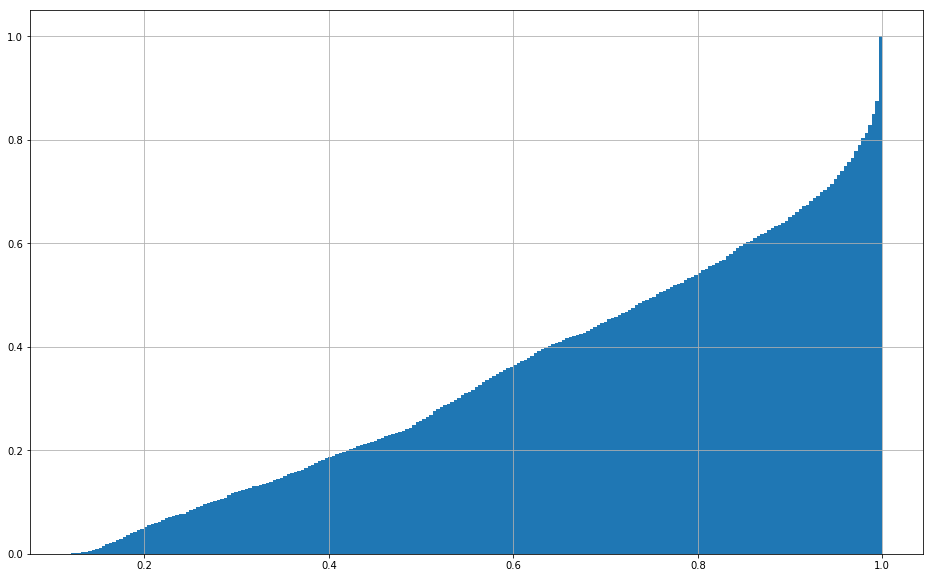

In [69]:
prob_sorted.max_prob.hist(cumulative=True, normed=1, bins=233)

In [88]:
prob_sorted[prob_sorted.predict == "unknown"].head(100)

,is_valid,path,plnum,possible_label,uid,yes,no,up,down,left,right,on,off,stop,go,silence,unknown,predict,max_prob
3031,False,data/augment/2017_12_25_00_55_41/mix_random/go...,9,go,fb7cfe0e,5.271999e-02,1.212936e-01,3.861202e-02,4.675889e-02,6.879329e-02,1.547717e-01,1.230406e-01,5.143092e-02,3.497603e-02,1.211063e-01,1.967907e-02,0.166818,unknown,0.166818
2251,False,data/augment/2017_12_25_00_55_41/mix_random/st...,8,stop,48bdc11c,1.024681e-01,2.233793e-02,2.420464e-02,1.605615e-01,6.107511e-02,1.700823e-01,7.942784e-02,1.904793e-02,1.259925e-01,4.880458e-02,9.227631e-03,0.176770,unknown,0.176770
2979,False,data/augment/2017_12_25_00_55_41/mix_random/on...,6,on,6c2dd2d5,1.087654e-01,7.407939e-02,1.374757e-02,1.742922e-01,1.029088e-01,1.034480e-01,1.819010e-02,4.538125e-03,2.576983e-02,9.686223e-02,9.294686e-02,0.184451,unknown,0.184451
2023,False,data/augment/2017_12_25_00_55_41/mix_random/ye...,0,yes,60472d26,1.881303e-01,1.087810e-01,1.789652e-02,8.349217e-02,1.015825e-01,7.275441e-02,5.123811e-02,2.873452e-02,1.012173e-02,8.166442e-02,2.089420e-02,0.234710,unknown,0.234710
670,False,data/augment/2017_12_25_00_55_41/speed_up/no/7...,1,no,7014b07e,2.269739e-02,9.061540e-02,1.190025e-01,1.541762e-02,1.418767e-01,2.511297e-02,1.730300e-02,8.268668e-02,6.835230e-02,1.603886e-01,1.213264e-04,0.256426,unknown,0.256426
3079,False,data/augment/2017_12_25_00_55_41/mix_random/ri...,5,right,8781f4c1,5.527072e-02,3.093703e-03,3.247463e-02,1.061370e-01,2.641150e-01,1.775416e-01,4.925075e-03,1.195667e-03,6.080858e-02,1.577507e-02,7.726595e-03,0.270936,unknown,0.270936
2271,False,data/augment/2017_12_25_00_55_41/mix_random/no...,1,no,06a79a03,1.651077e-01,2.049245e-01,8.380088e-03,4.393060e-02,4.943613e-02,5.564093e-02,5.279321e-03,1.901694e-03,2.457891e-03,1.476485e-01,4.279533e-02,0.272497,unknown,0.272497
1077,False,data/augment/2017_12_25_00_55_41/shift_forward...,1,no,7014b07e,3.092390e-03,1.872459e-01,8.921272e-04,2.086921e-01,3.951249e-03,6.563939e-04,3.310076e-04,1.887301e-03,7.693347e-02,2.387160e-01,2.383580e-06,0.277600,unknown,0.277600
2667,False,data/augment/2017_12_25_00_55_41/mix_random/do...,3,down,571c044e,8.179786e-02,2.363384e-01,3.819370e-02,9.844729e-02,9.893728e-02,7.434006e-02,4.523637e-03,3.316300e-03,1.697221e-02,5.336811e-02,1.377832e-02,0.279987,unknown,0.279987
218,False,data/augment/2017_12_25_00_55_41/speed_down/st...,8,stop,7014b07e,2.321491e-02,3.501280e-02,1.810175e-02,2.102038e-01,1.787484e-02,3.182293e-02,3.778897e-02,6.700156e-02,2.288873e-01,3.605209e-02,2.033016e-03,0.292006,unknown,0.292006


In [90]:
def show_sample(row):
    sr, wav = wavfile.read(row.path)
    print("fname: {}\tlabel: {}\tpredict: {}\tprobs: {}".format(row.path, row.possible_label, row.predict, row.max_prob))
    IPD.display(IPD.Audio(wav, rate=sr))

print(len(prob_sorted[prob_sorted.possible_label == "unknown"].head(20).apply(show_sample, axis=1)))

fname: data/augment/2017_12_25_00_55_41/mix_random/eight/bf4af1af_nohash_1.wav	label: unknown	predict: stop	probs: 0.12144763767719267


fname: data/augment/2017_12_25_00_55_41/mix_random/bird/c25a032b_nohash_0.wav	label: unknown	predict: right	probs: 0.1288762092590332


fname: data/augment/2017_12_25_00_55_41/mix_random/happy/60472d26_nohash_0.wav	label: unknown	predict: left	probs: 0.12921449542045593


fname: data/augment/2017_12_25_00_55_41/mix_random/six/21cbe292_nohash_0.wav	label: unknown	predict: on	probs: 0.13115441799163818


fname: data/augment/2017_12_25_00_55_41/mix_random/one/6d2d3b0d_nohash_3.wav	label: unknown	predict: stop	probs: 0.13267076015472412


fname: data/augment/2017_12_25_00_55_41/mix_random/cat/a996cf66_nohash_0.wav	label: unknown	predict: stop	probs: 0.13346531987190247


fname: data/augment/2017_12_25_00_55_41/mix_random/six/5e1b34a6_nohash_0.wav	label: unknown	predict: yes	probs: 0.13619297742843628


fname: data/augment/2017_12_25_00_55_41/mix_random/zero/c25a032b_nohash_0.wav	label: unknown	predict: down	probs: 0.1368529200553894


fname: data/augment/2017_12_25_00_55_41/mix_random/nine/87c62767_nohash_1.wav	label: unknown	predict: down	probs: 0.14096787571907046


fname: data/augment/2017_12_25_00_55_41/mix_random/cat/aeb99b1c_nohash_1.wav	label: unknown	predict: down	probs: 0.1419052928686142


fname: data/augment/2017_12_25_00_55_41/mix_random/one/87c62767_nohash_1.wav	label: unknown	predict: right	probs: 0.14210110902786255


fname: data/augment/2017_12_25_00_55_41/mix_random/five/c0e0f834_nohash_0.wav	label: unknown	predict: up	probs: 0.14364178478717804


fname: data/augment/2017_12_25_00_55_41/mix_random/six/4fe01997_nohash_1.wav	label: unknown	predict: go	probs: 0.14393848180770874


fname: data/augment/2017_12_25_00_55_41/mix_random/eight/f8ad3941_nohash_0.wav	label: unknown	predict: silence	probs: 0.14577846229076385


fname: data/augment/2017_12_25_00_55_41/mix_random/sheila/3209ec42_nohash_0.wav	label: unknown	predict: right	probs: 0.1470417082309723


fname: data/augment/2017_12_25_00_55_41/mix_random/marvin/257251e0_nohash_0.wav	label: unknown	predict: stop	probs: 0.14808398485183716


fname: data/augment/2017_12_25_00_55_41/mix_random/dog/ba770f9b_nohash_0.wav	label: unknown	predict: down	probs: 0.14906956255435946


fname: data/augment/2017_12_25_00_55_41/mix_random/five/e3b64217_nohash_1.wav	label: unknown	predict: left	probs: 0.14944906532764435


fname: data/augment/2017_12_25_00_55_41/mix_random/bed/e14a99a5_nohash_1.wav	label: unknown	predict: up	probs: 0.15079624950885773


fname: data/augment/2017_12_25_00_55_41/mix_random/marvin/573cdb8a_nohash_0.wav	label: unknown	predict: silence	probs: 0.15304157137870789


20


In [111]:
sr, wav = wavfile.read('input/train/audio/marvin/573cdb8a_nohash_0.wav')
IPD.display(IPD.Audio(wav, rate=sr))
IPD.display(IPD.Audio(10*wav, rate=sr))

In [108]:
np.abs(wav).max()

7902